# CNN for AED with Keras/TensorFlow

Date: March 2, 2019

Classification of acoustic events:

- Umai
- Mazui
- Oishii
- Others
- Silence

## Preparing data set for CNN

In [253]:
DATASET_FOLDER = '../dataset/data_restaurant'

%run ../oscilloscope/script/dataset.py

ds = DataSet(DATASET_FOLDER)
train_data, train_labels, test_data, test_labels = ds.generate()
shape = ds.shape
class_labels = ds.class_labels

In [254]:
shape

(64, 40)

### CNN model

In [255]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(*shape, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(class_labels), activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 62, 38, 8)         80        
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 31, 19, 8)         0         
_________________________________________________________________
dropout_57 (Dropout)         (None, 31, 19, 8)         0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 29, 17, 16)        1168      
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 14, 8, 16)         0         
_________________________________________________________________
dropout_58 (Dropout)         (None, 14, 8, 16)         0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 12, 6, 32)         4640      
__________

In [256]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

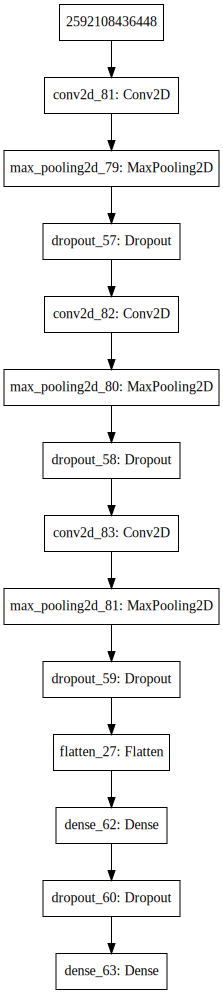

In [257]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Training CNN

In [258]:
EPOCHS = 50
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_data=(test_data, test_labels))

Train on 1260 samples, validate on 540 samples
Epoch 1/50
1260/1260 [==============================] - 54s 43ms/step - loss: 2.7922 - acc: 0.1246 - val_loss: 2.5413 - val_acc: 0.3852
Epoch 2/50
1260/1260 [==============================] - 52s 42ms/step - loss: 2.2450 - acc: 0.2794 - val_loss: 1.8324 - val_acc: 0.5148
Epoch 3/50
1260/1260 [==============================] - 53s 42ms/step - loss: 1.7805 - acc: 0.4143 - val_loss: 1.3365 - val_acc: 0.7426
Epoch 4/50
1260/1260 [==============================] - 54s 43ms/step - loss: 1.3621 - acc: 0.5579 - val_loss: 0.9082 - val_acc: 0.8111
Epoch 5/50
1260/1260 [==============================] - 54s 43ms/step - loss: 1.1251 - acc: 0.6452 - val_loss: 0.6921 - val_acc: 0.8685
Epoch 6/50
1260/1260 [==============================] - 52s 42ms/step - loss: 0.8372 - acc: 0.7270 - val_loss: 0.5014 - val_acc: 0.9000
Epoch 7/50
1260/1260 [==============================] - 52s 41ms/step - loss: 0.7285 - acc: 0.7810 - val_loss: 0.4252 - val_acc: 0.9093
E

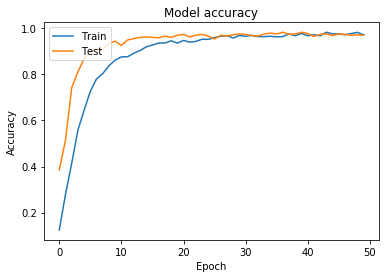

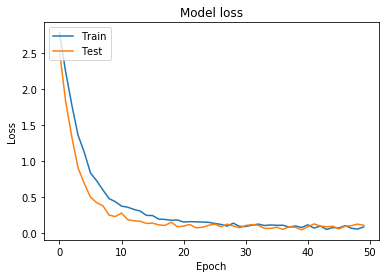

In [276]:
%run history.py
%matplotlib inline

plot_accuracy(history)
plot_loss(history)

## Save the model

In [277]:
import datetime

dt = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
filename = DATASET_FOLDER + '/cnn_for_aed_restaurant{}.h5'.format(dt)
model.save(filename)

## Load the model

In [278]:
del model
model = models.load_model(filename)

## Confirmation

In [279]:
import numpy as np
import matplotlib.pyplot as plt
train_data.shape

(1260, 64, 40, 1)

In [280]:
layer_outputs = [layer.output for layer in model.layers]
#layer_outputs

In [281]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_data)
#activations[0][0,:,:,0].shape

In [282]:
class_labels

['umai',
 'mazui',
 'oishii',
 'silence',
 'others',
 'a',
 'i',
 'o',
 'sushi',
 'sashimi',
 'gyouza',
 'hashi',
 'spoon',
 'fork',
 'syouyu',
 'sakana',
 'niku',
 'gohan']

In [283]:
(activations[-1][:10]*100).astype(int)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   3,  21,   0,  75,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        100,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  99,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  99,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  99,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  99,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 100],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  99,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 100,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,  99,   0,   0,

In [284]:
test_labels[:10].astype(int)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [285]:
def plot_layer(activations, sample, layer):
    a = activations[layer].shape
    rows = int(a[3]/4)
    fig, axarr = plt.subplots(rows, 4, figsize=[20,15])
    for i in range(a[3]):
        row = int(i/4)
        x, y = row, i-4*row
        axarr[x, y].imshow(np.rot90(activations[layer][sample, :, :, i]))
        axarr[x, y].set_xticks([])
        axarr[x, y].set_yticks([])

'umai'

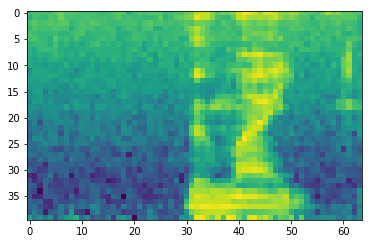

In [286]:
image_number = 24

plt.imshow(np.rot90(test_data[image_number,:,:,0]))
class_labels[np.argmax(test_labels[image_number])]

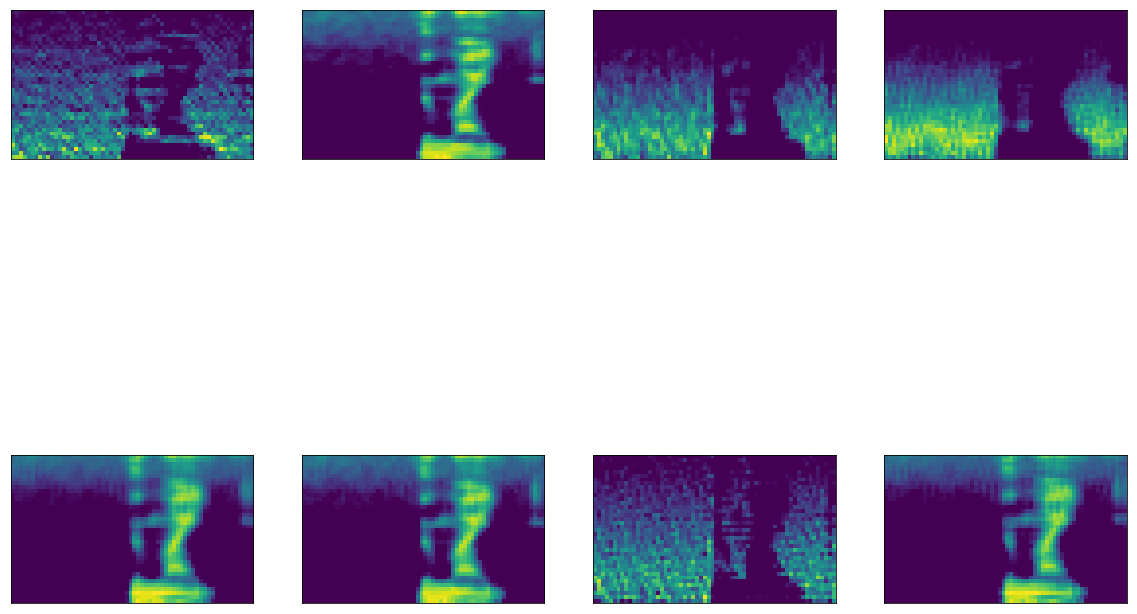

In [287]:
plot_layer(activations, image_number, 0)

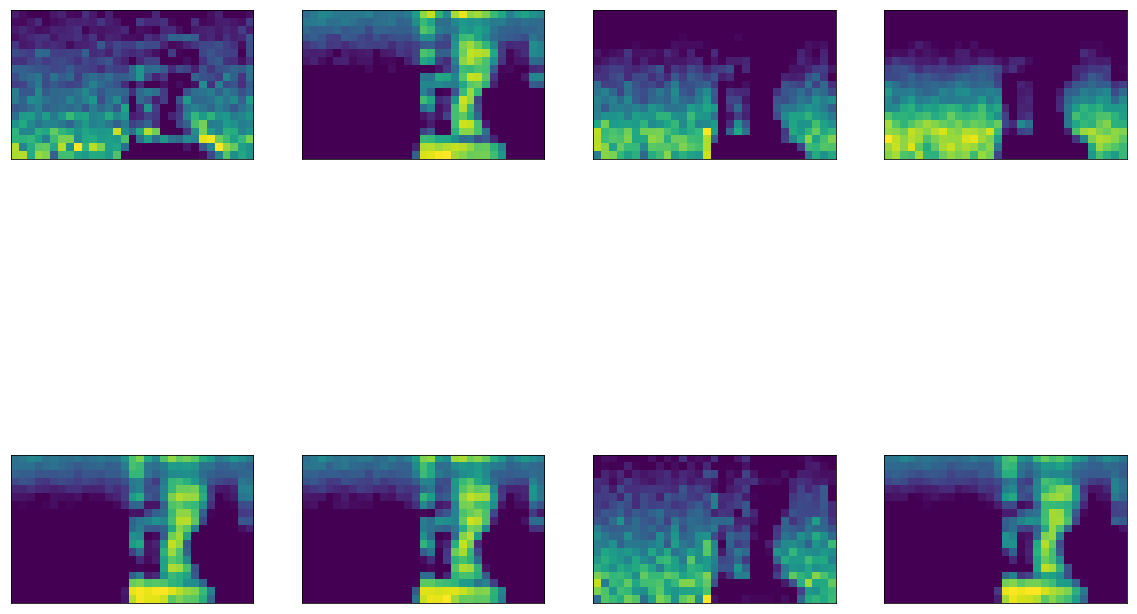

In [288]:
plot_layer(activations, image_number, 1)

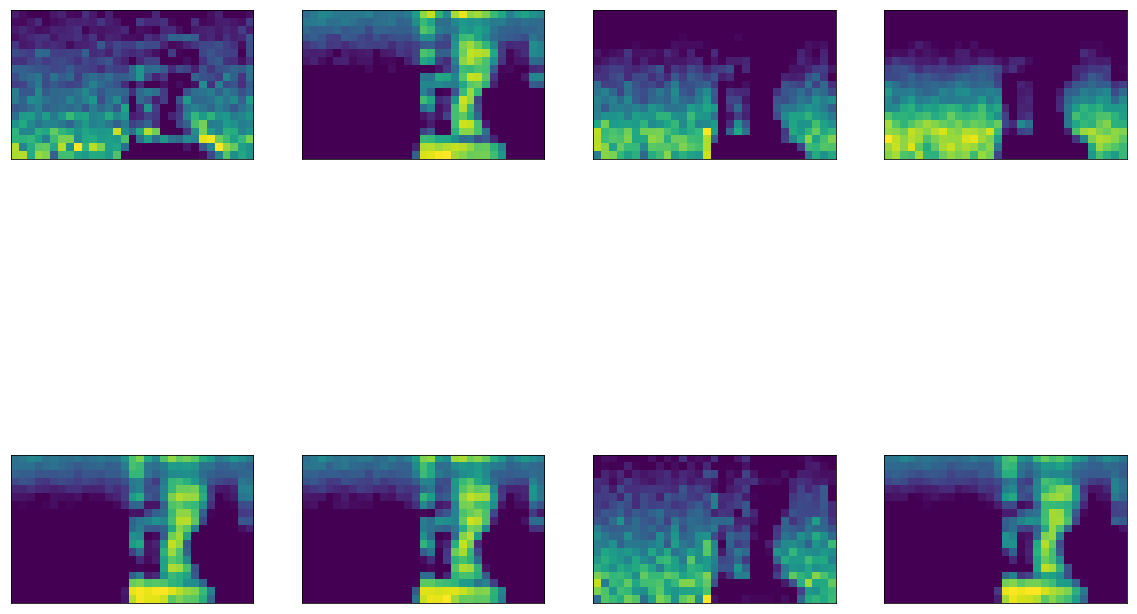

In [289]:
plot_layer(activations, image_number, 2)

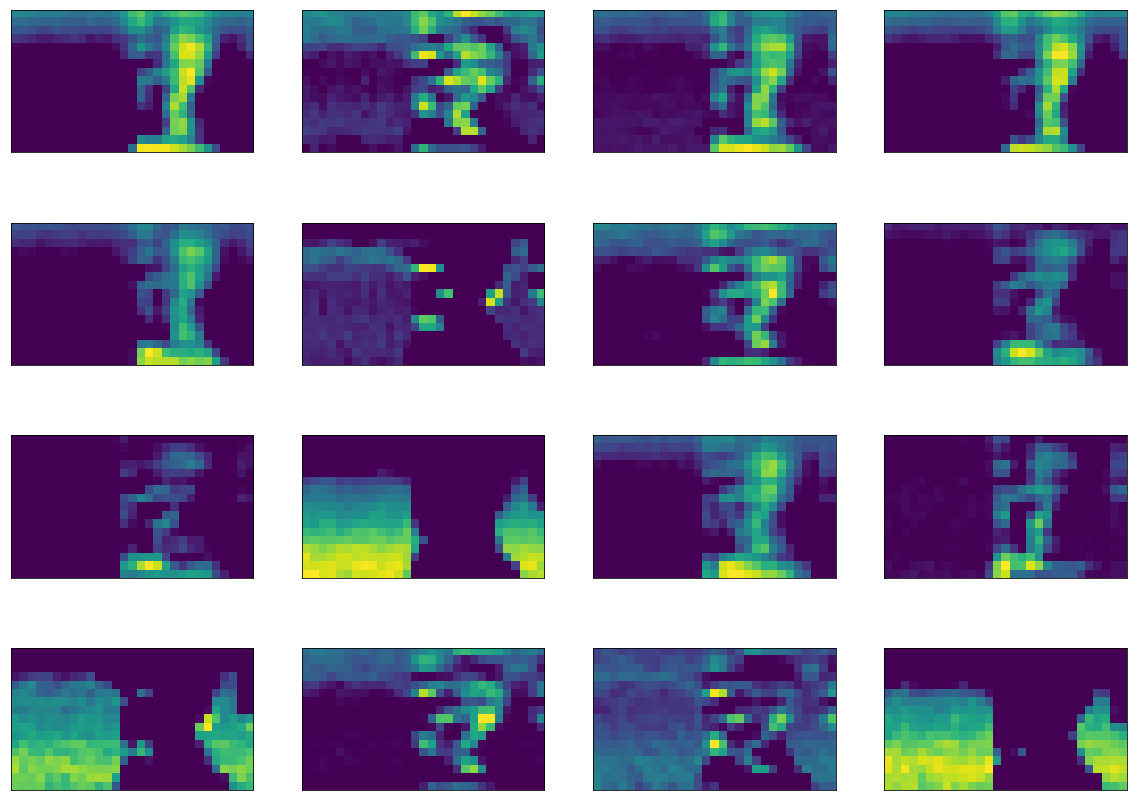

In [290]:
plot_layer(activations, image_number, 3)

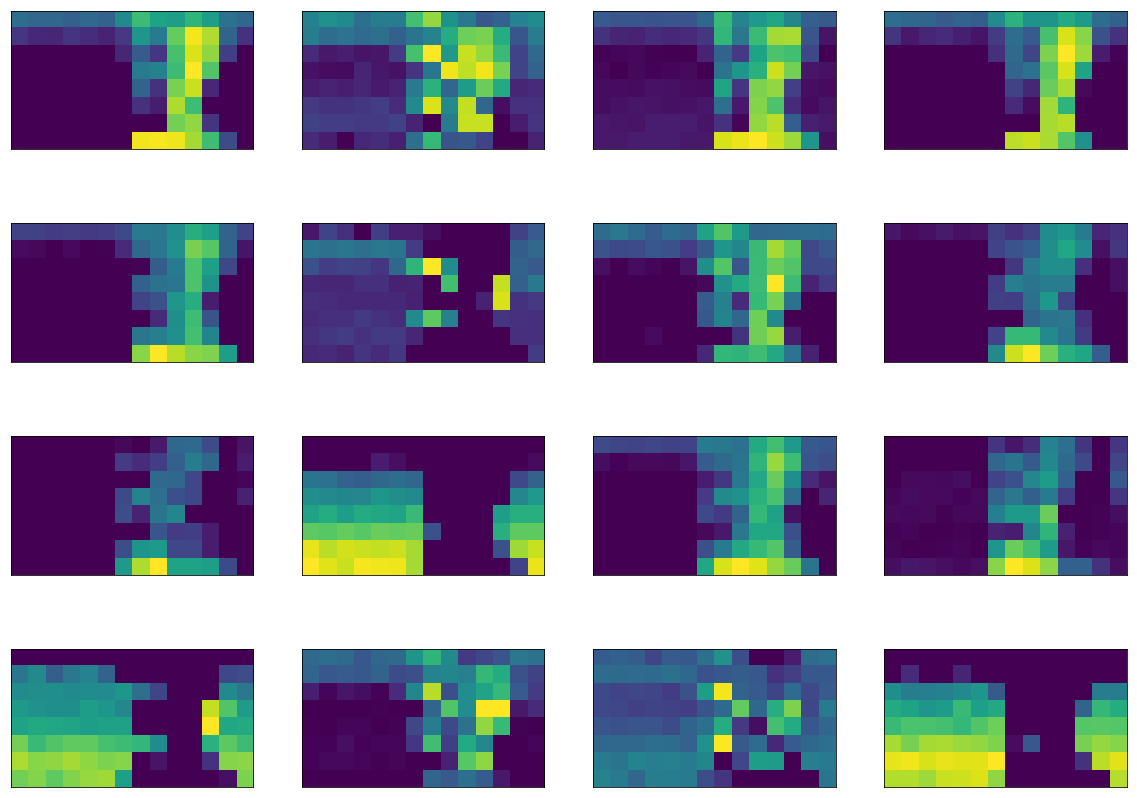

In [291]:
plot_layer(activations, image_number, 4)

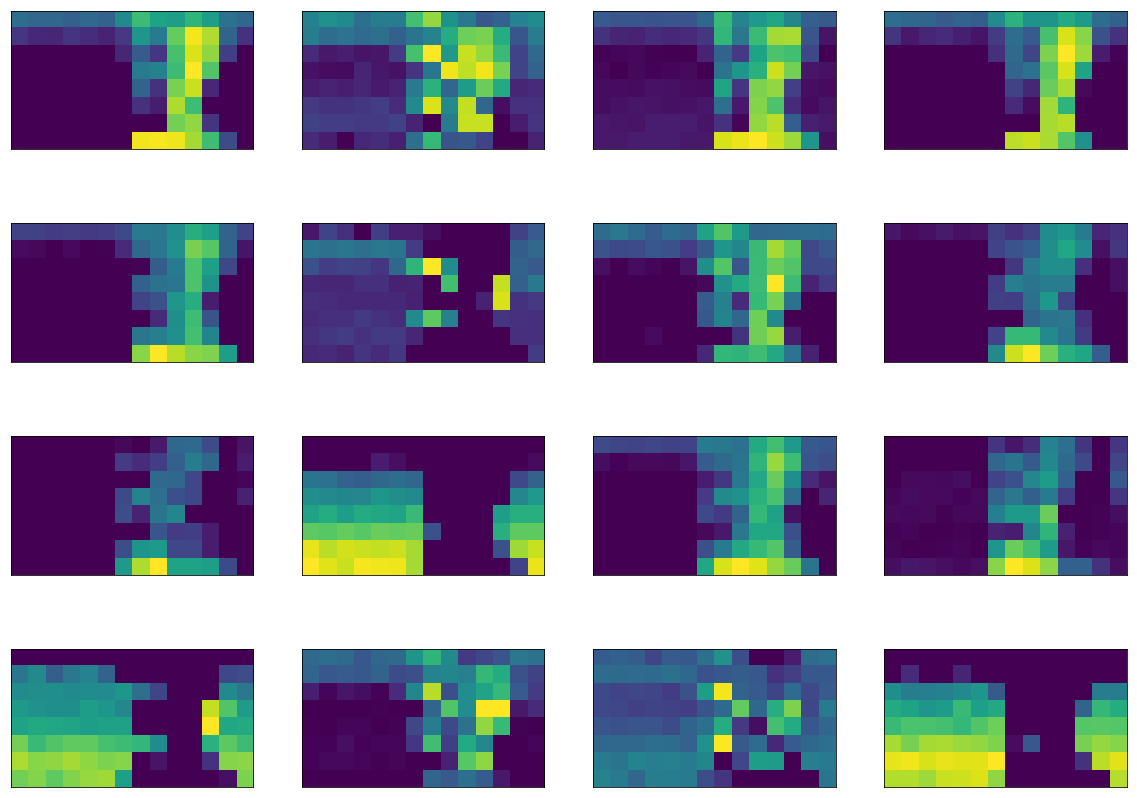

In [292]:
plot_layer(activations, image_number, 5)

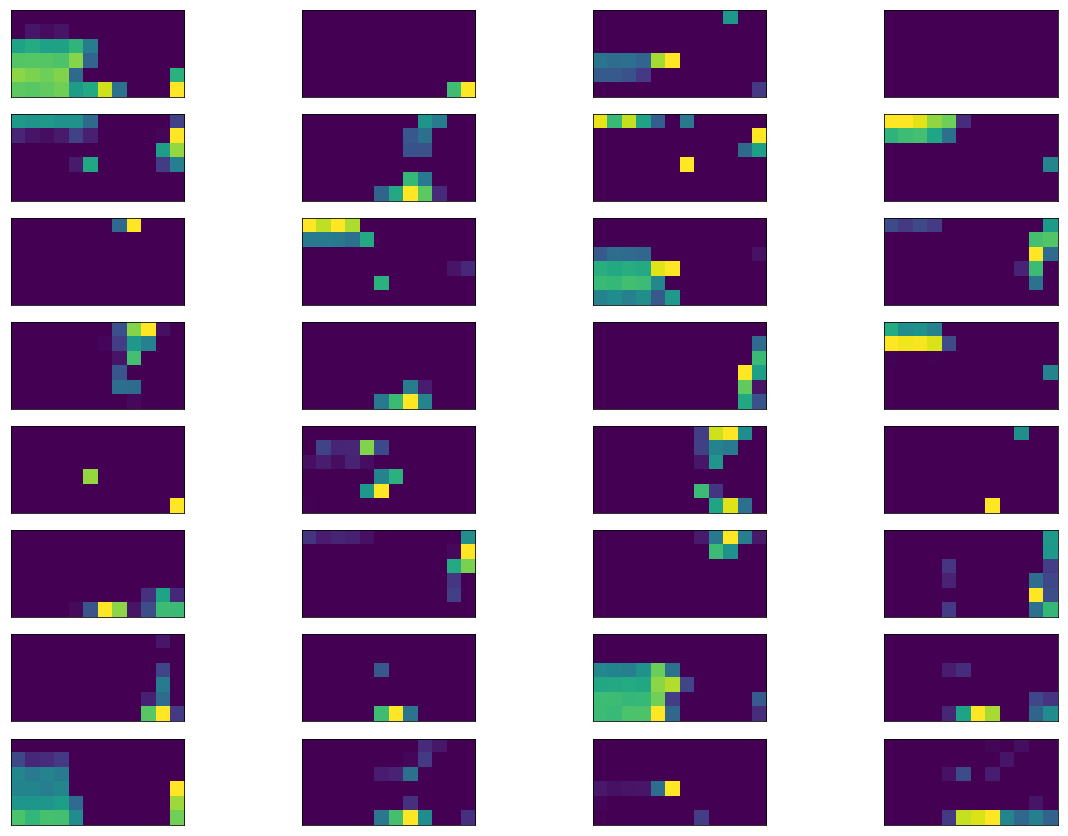

In [293]:
plot_layer(activations, image_number, 6)

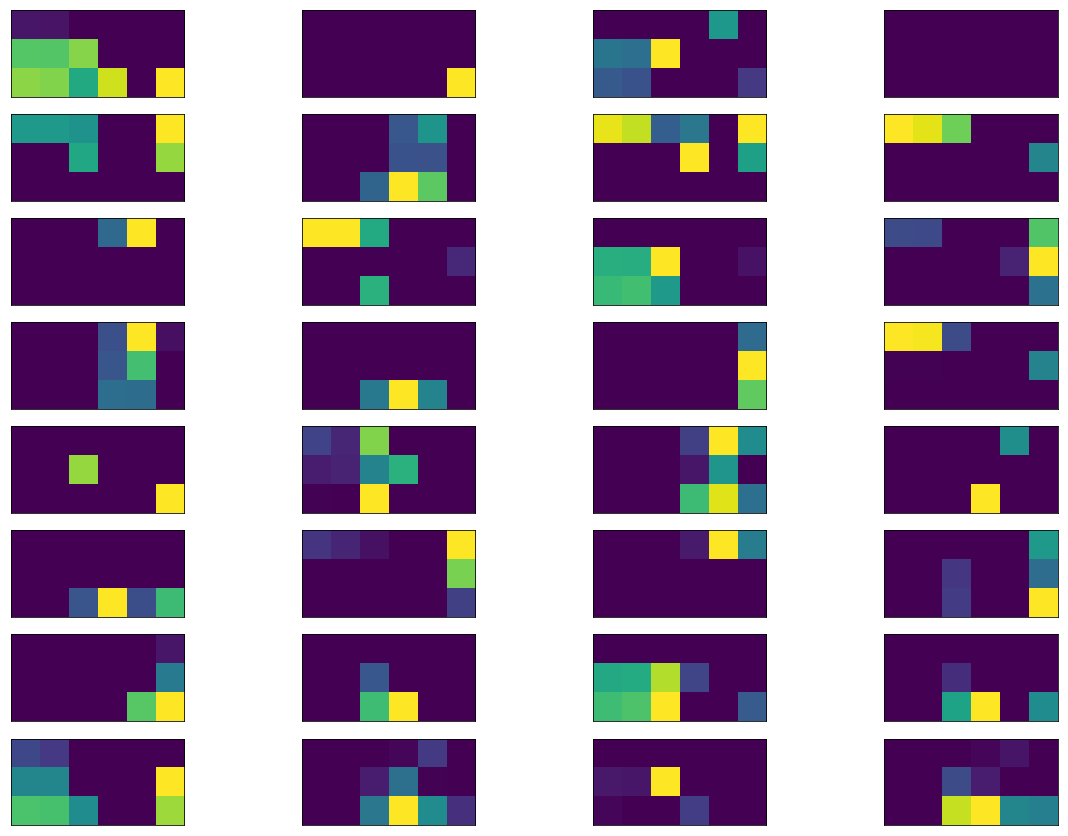

In [294]:
plot_layer(activations, image_number, 7)